In [1]:
# MicroCreditDefaulter Prediction



import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv('C:\ProgramData\microCredit_Defaulter.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


In [2]:
df.shape

(209593, 37)

In [3]:
# Exploratory Data Analysis
# Important Observations :
# The dataset comprises of 209593 rows and 37 columns.


#label	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
#msisdn	mobile number of user
#aon	age on cellular network in days
#daily_decr30	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
#daily_decr90	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
#rental30	Average main account balance over last 30 days
#rental90	Average main account balance over last 90 days
#last_rech_date_ma	Number of days till last recharge of main account
#last_rech_date_da	Number of days till last recharge of data account
#last_rech_amt_ma	Amount of last recharge of main account (in Indonesian Rupiah)
#cnt_ma_rech30	Number of times main account got recharged in last 30 days
#fr_ma_rech30	Frequency of main account recharged in last 30 days
#sumamnt_ma_rech30	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
#medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
#medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
#cnt_ma_rech90	Number of times main account got recharged in last 90 days
#fr_ma_rech90	Frequency of main account recharged in last 90 days
#sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
#medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
#medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
#cnt_da_rech30	Number of times data account got recharged in last 30 days
#fr_da_rech30	Frequency of data account recharged in last 30 days
#cnt_da_rech90	Number of times data account got recharged in last 90 days
#fr_da_rech90	Frequency of data account recharged in last 90 days
#cnt_loans30	Number of loans taken by user in last 30 days
#amnt_loans30	Total amount of loans taken by user in last 30 days
#maxamnt_loans30	maximum amount of loan taken by the user in last 30 days
#medianamnt_loans30	Median of amounts of loan taken by the user in last 30 days
#cnt_loans90	Number of loans taken by user in last 90 days
#amnt_loans90	Total amount of loans taken by user in last 90 days
#maxamnt_loans90	maximum amount of loan taken by the user in last 90 days
#medianamnt_loans90	Median of amounts of loan taken by the user in last 90 days
#payback30	Average payback time in days over last 30 days
#payback90	Average payback time in days over last 90 days
#pcircle	telecom circle
#pdate	date


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
# Above data shows there are 209593 rows and 37 columns ,all columns mostly of integer ,float type with few of object type

In [6]:
# Statistical summary
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [7]:
# From the above data ,it is clear that in few columns , std is more than mean ,so there are chances of 
# outliers in the data 

In [8]:
# checking for null values in dataset

df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
# Now we can drop features like 'pcircle','pdate','Unnamed: 0' which have leass importance in regards to other variables

df.drop(['pcircle','pdate','Unnamed: 0','msisdn'],axis=1,inplace=True)

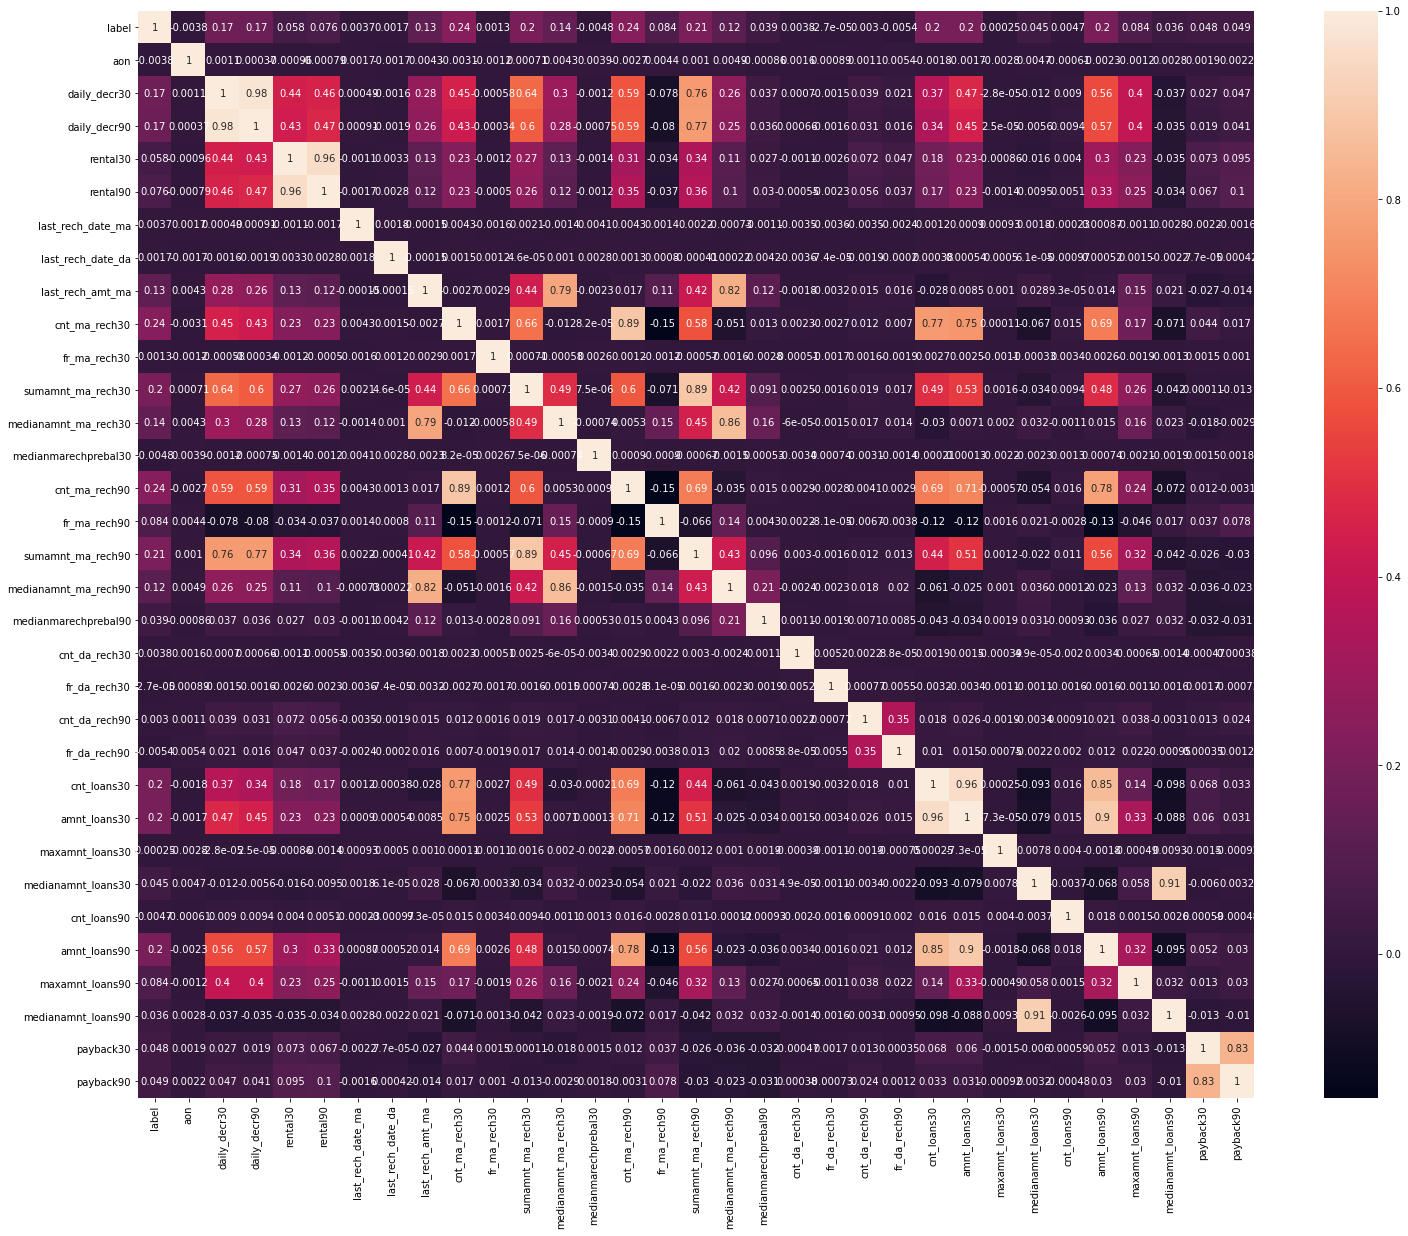

In [10]:
# checking correlation of independent variables with 'label' variable

plt.figure(figsize=(25,20))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [11]:
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

In [12]:
# Clearly from above correlation matrix and data , 'SalePrice' has positive correlation maximum with cnt_ma_rech30,cnt_ma_rech90,
# sumamnt_ma_rech90,sumamnt_ma_rech30 and negatively correlated with medianmarechprebal30 ,fr_da_rech90 ,fr_da_rech30   

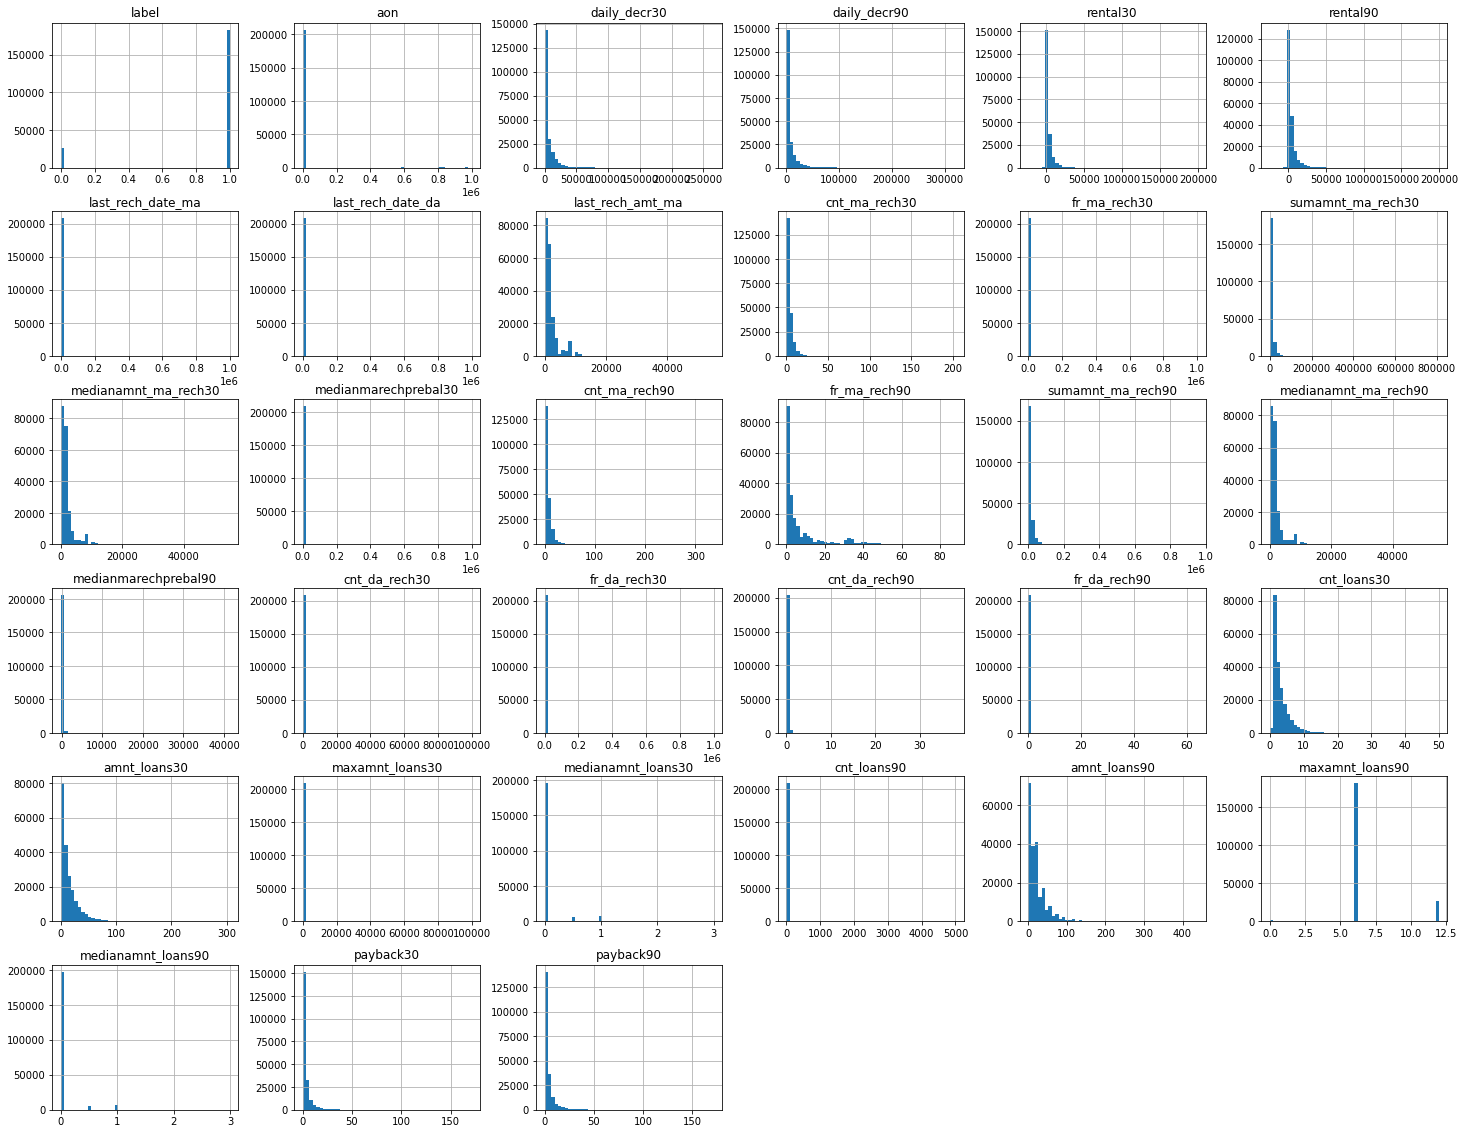

In [13]:
# Lets look at the distribution of all the numeric variables
%matplotlib inline

df.hist(bins=50, figsize=(25,20))
plt.show()

In [14]:
# Clearly outliers are visible in many features.We will check them later

<AxesSubplot:xlabel='label', ylabel='Density'>

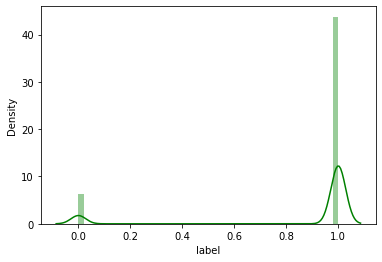

In [15]:
# checking distibution of label feature

sns.distplot(df['label'], color = 'green')

In [16]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [17]:
# Clearly there is imbalanced data .We need to check this

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

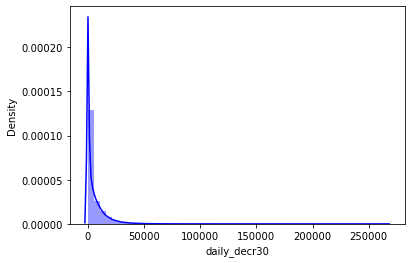

In [18]:
# checking distibution of daily_decr30 feature

sns.distplot(df['daily_decr30'], color = 'blue')

In [19]:
# Clearly daily_decr30 feature is rightly skewed

<AxesSubplot:xlabel='rental90', ylabel='Density'>

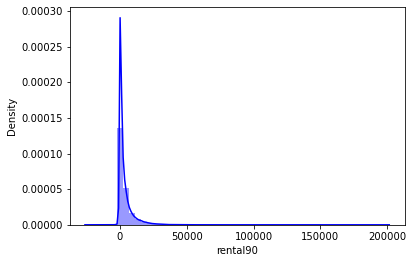

In [20]:
# checking distibution of rental90 feature

sns.distplot(df['rental90'], color = 'blue')

In [21]:
# Clearly rental90 feature is rightly skewed

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

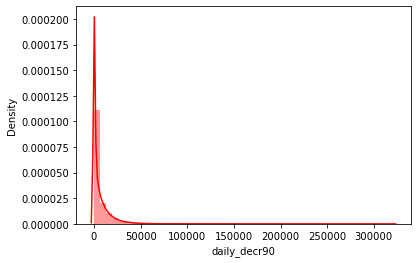

In [22]:
# checking distibution of daily_decr90 feature

sns.distplot(df['daily_decr90'], color = 'red')

In [23]:
# Clearly daily_decr90 feature is rightly skewed

<AxesSubplot:xlabel='payback30', ylabel='Density'>

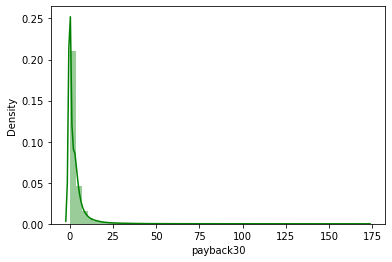

In [24]:
# checking distibution of payback30 feature

sns.distplot(df['payback30'], color = 'green')

<AxesSubplot:xlabel='payback90', ylabel='Density'>

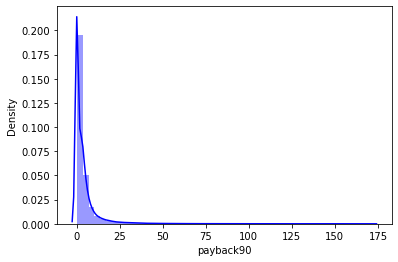

In [25]:
# checking distibution of payback90 feature

sns.distplot(df['payback90'], color = 'blue')

<AxesSubplot:xlabel='label', ylabel='rental30'>

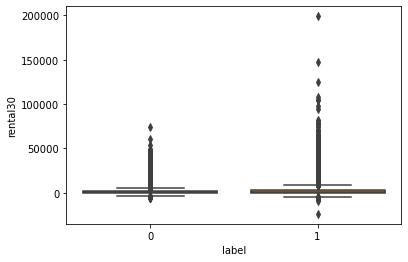

In [26]:
# Relation between label and rental30

sns.boxplot(x='label',y='rental30',data=df)

<AxesSubplot:xlabel='label', ylabel='rental90'>

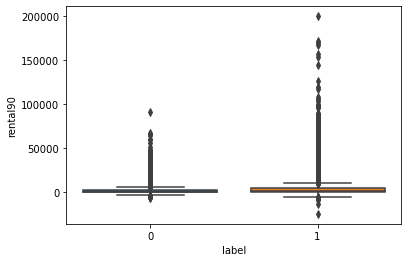

In [27]:
# Relation between label and rental90

sns.boxplot(x='label',y='rental90',data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

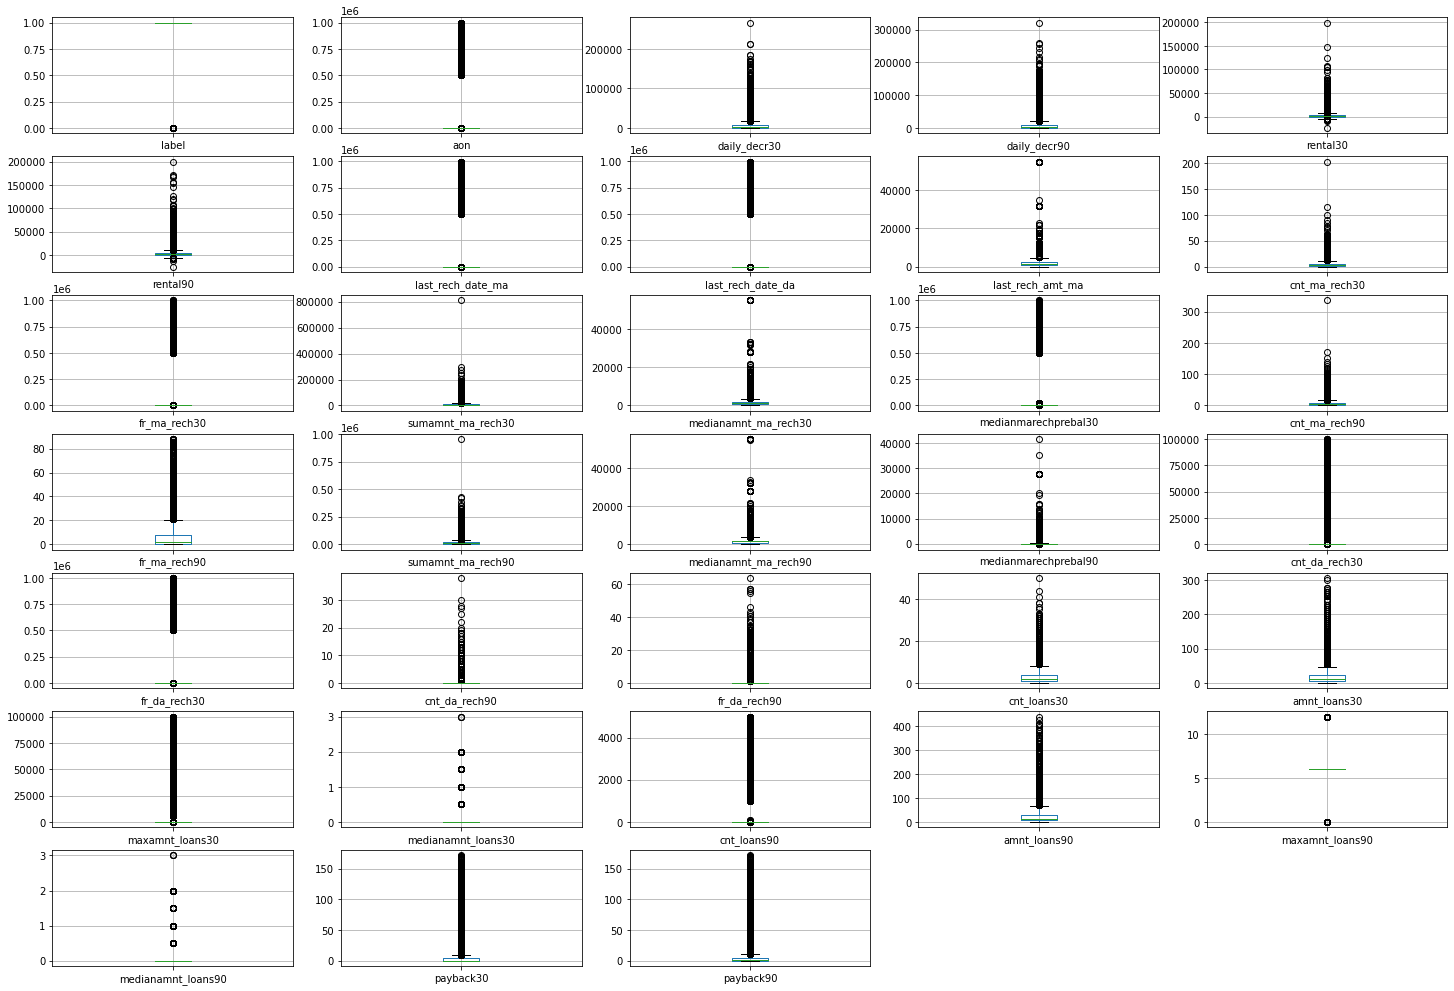

In [28]:
# Checking outliers in data


df.plot(kind='box', subplots=True, layout=(8,5), figsize=(25,20), grid=True)
plt.show

In [29]:
# Clearly there are outliers present in dataset

In [30]:
#Removing outliers and unrealistic values

# Position of the Outlier
index=np.where((df['fr_ma_rech30']>1000)|(df['last_rech_date_da']>1000)|(df['last_rech_date_ma']>1000)|(df['aon']>20000))

In [31]:
index

(array([    30,     53,     65, ..., 209531, 209533, 209576], dtype=int64),)

In [32]:
df=df.drop(df.index[index])   #Removing outliers and unrealistic values

In [33]:
df.shape

(204406, 33)

In [34]:
# Splitting dataset into X and Y

X=df.drop('label',axis=1)
y=df.label

In [35]:

# Scaling the dataset and normalizing feature variables

from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()
X_features=X
X= scale.fit_transform(X)

In [36]:
# Balancing unbalanced dataset

from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)


In [37]:

# Training the model using LogisticRegression and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_lr_1 = LogisticRegression()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_lr_1.fit(X_train, y_train)
    y_pred_lr_1 = model_lr_1.predict(X_test)
    score=accuracy_score(y_test,y_pred_lr_1)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for LogisticRegression : ',state)
print('best accuracy score for LogisticRegression : ',score_s)

best random_state for LogisticRegression :  20
best accuracy score for LogisticRegression :  0.7698929539674111


In [38]:
# Accuracy score for LogisticRegression on training data

y_pred_lr_train = model_lr_1.predict(X_train)
score_train=accuracy_score(y_train,y_pred_lr_train)
print('best accuracy score for LogisticRegression on training data : ',score_train)

best accuracy score for LogisticRegression on training data :  0.7689306975759923


In [39]:
# finding classification_report for LogisticRegression

print(classification_report(y_test, y_pred_lr_1))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78     53542
           1       0.80      0.72      0.75     53795

    accuracy                           0.77    107337
   macro avg       0.77      0.77      0.77    107337
weighted avg       0.77      0.77      0.77    107337



In [40]:
# finding cross validation score 

cvs = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for LogisticRegression : ",cvs)

cross_val_score for LogisticRegression :  0.7652906435629978


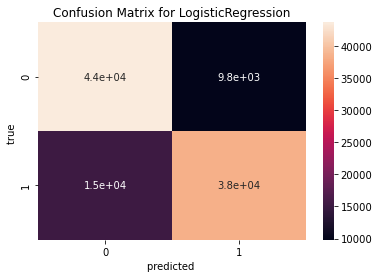

In [41]:
# confusion matrix of LogisticRegression model

cm=confusion_matrix(y_test,y_pred_lr_1)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

In [42]:
# Training the model using DecisionTreeClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_dtc = DecisionTreeClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dtc.fit(X_train, y_train)
    y_pred_dtc = model_dtc.predict(X_test)
    score=accuracy_score(y_test,y_pred_dtc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for DecisionTreeClassifier : ',state)
print('best accuracy score for DecisionTreeClassifier : ',score_s)

best random_state for DecisionTreeClassifier :  3
best accuracy score for DecisionTreeClassifier :  0.8862927042864995


In [43]:
# finding classification_report for DecisionTreeClassifier

print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     53542
           1       0.89      0.87      0.88     53795

    accuracy                           0.88    107337
   macro avg       0.88      0.88      0.88    107337
weighted avg       0.88      0.88      0.88    107337



In [44]:
# finding cross validation score for DecisionTreeClassifier 

cvs = cross_val_score(DecisionTreeClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for DecisionTreeClassifier  : ",cvs)

cross_val_score for DecisionTreeClassifier  :  0.8630760955170291


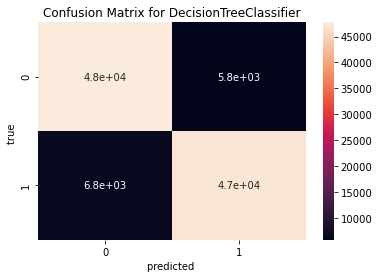

In [45]:
# confusion matrix of DecisionTreeClassifier  model

cm=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [ ]:
# Training the model using SVC and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_svc =SVC()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_svc.fit(X_train, y_train)
    y_pred_svc = model_svc.predict(X_test)
    score=accuracy_score(y_test,y_pred_svc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for SVC model : ',state)
print('best accuracy score for SVC model : ',score_s)


In [ ]:
# Comparing accuracy score and cross val score of differnet models, DecisionTreeClassifier model seems to be best 
# model for this problem

In [46]:
# HyperParameterTuning using DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3}
Best score is 0.8750184421191124


In [47]:
tree_cv_predictions = tree_cv.predict(X_test)
 
# print classification report
print(classification_report(y_test, tree_cv_predictions))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     53542
           1       0.89      0.87      0.88     53795

    accuracy                           0.88    107337
   macro avg       0.88      0.88      0.88    107337
weighted avg       0.88      0.88      0.88    107337



In [48]:
accuracy_score(y_test,tree_cv_predictions)    # checking final accuracy

0.8797246056811724

In [ ]:
# Final accuracy_score clearly states that DecisionTtreeClassifer model is very good enough to predict 'MicroCreditDefaulter'

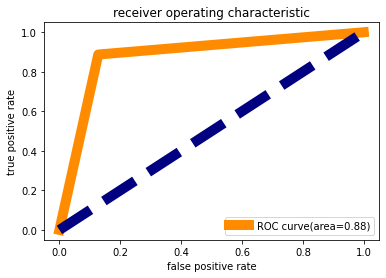

In [50]:
# AUC_ROC curve

from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(tree_cv_predictions,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Above roc_curve area clearly states the goodness of DecisionTtreeClassifer model for predicting 'MicroCreditDefaulter'

In [ ]:
# Exporting the model through pickle

import pickle
filename='loan_app_status.pkl'
pickle.dump(tree_cv,open(filename,'wb'))

In [51]:
# Conclusion:

import numpy as np
a=np.array(y_test)
predicted=np.array(tree_cv.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com.head(20)

,original,predcited
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,1,0
6,1,1
7,1,1
8,0,0
9,0,0


In [ ]:
# Clearly above data shows that  DecisionTtreeClassifer model is very good enough to predict 'MicroCreditDefaulter"